 This notebook was part of TestUVfromColdStart, just plot to see the RMS between original nowcast and that from cold start, with other conditions all the same. 

In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime 
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from salishsea_tools.nowcast import analyze

from __future__ import division
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [23]:
sites = {
    'Sandheads': {
        'lat': 49.10,
        'lon': -123.30,
        'i' : 77,##426 start from 349 fortran start from 350
        'j' : 34,##293 start from 259 fortran start from 260
    },
    'VENUS East':{
        'lat' : 49.0419,
        'lon' : -123.3176,
        'depth' : 170,
        'i' : 67,
        'j' : 24
    },    
    'VENUS Central': {
        'lat': 49.0401,
        'lon': -123.4261,
        'depth' : 300,
        'i': 75,
        'j': 7
        },

    'VENUS Delta': {
        'lat': 49.0807167,
        'lon': -123.3400617,
        'i':  76,
        'j':25
    },
    'S4-3':{
        'lat': 49.25 ,
        'lon':  -123.375,
        'i':112,
        'j': 41
        },
    }
# Font format
title_font = {
    'fontname': 'Bitstream Vera Sans', 'size': '20', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '18'}

In [3]:
to = datetime.datetime(2015,6,16)
tf = datetime.datetime(2015,6,29)

#daily averages
files_U = analyze.get_filenames(to,tf,'1h','grid_U','/data/dlatorne/MEOPAR/SalishSea/nowcast/')
u_daily, time_daily = analyze.combine_files(files_U, 'vozocrtx',0,\
                    sites['Sandheads']['i']+349,sites['Sandheads']['j'] + 259)
files_V = analyze.get_filenames(to,tf,'1h','grid_V','/data/dlatorne/MEOPAR/SalishSea/nowcast/')
v_daily, time_daily = analyze.combine_files(files_V, 'vomecrty',0,\
                    sites['Sandheads']['i']+349,sites['Sandheads']['j'] + 259)

In [4]:
too = datetime.datetime(2015,6,15)
tff = datetime.datetime(2015,6,29)
filess = analyze.get_filenames(too,tff,'1d','grid_T','/data/dlatorne/MEOPAR/SalishSea/nowcast/')
none, time_dailyuse = analyze.combine_files(filess, 'vosaline',0,\
                    sites['Sandheads']['i']+349,sites['Sandheads']['j'] + 259)

In [18]:
grid_U = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14days_nowcast_allthesame/1hnowcastallthesame06160629gridU.nc')
u = grid_U.variables['vozocrtx']
u_mine = np.nanmean(np.nanmean(u[:, 0 ,77:79, 34:38],axis = 1), axis = 1)
u_mine.shape

(336,)

In [5]:
def rms_bothnowcasts_15(u_daily,v_daily,time_dailyuse):
    """This function was made to calculate 
        root mean square of currents at Sandheads
        for nowcasts with Doug's and Mine"""
    grid_U = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14days_nowcast_allthesame/1hnowcastallthesame06160629gridU.nc')
    grid_V = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14days_nowcast_allthesame/1hnowcastallthesame06160629gridV.nc')
    grid_UU=nc.Dataset('/data/jieliu/MEOPAR/river-treatment/24hrs_nowcast_allthesame/15jun15/SalishSea_1h_20150615_20150615_grid_U.nc')
    grid_VV=nc.Dataset('/data/jieliu/MEOPAR/river-treatment/24hrs_nowcast_allthesame/15jun15/SalishSea_1h_20150615_20150615_grid_V.nc')
    grid_U_doug = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/15jun15/SalishSea_1h_20150615_20150615_grid_U.nc')
    grid_V_doug = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/15jun15/SalishSea_1h_20150615_20150615_grid_V.nc')
    
    u = grid_U.variables['vozocrtx']
    v = grid_V.variables['vomecrty']
    u_mine = u[:, 0 ,sites['Sandheads']['i'], sites['Sandheads']['j']]
    v_mine = v[:, 0, sites['Sandheads']['i'], sites['Sandheads']['j']]
    
    u_15 = grid_UU.variables['vozocrtx']
    v_15 = grid_VV.variables['vomecrty']
    u_15mine = u_15[:, 0 ,426, 293]
    v_15mine = v_15[:, 0 ,426, 293]
    
    u_15d = grid_U_doug.variables['vozocrtx']
    v_15d = grid_V_doug.variables['vomecrty']
    u_15doug = u_15d[:, 0 ,426, 293]
    v_15doug = v_15d[:, 0 ,426, 293]
    
    add_doug = np.zeros(time_dailyuse.shape)
    add_mine = np.zeros(time_dailyuse.shape)
    add_relative=np.zeros(time_dailyuse.shape)
    rms_doug = np.zeros(time_dailyuse.shape)
    rms_mine = np.zeros(time_dailyuse.shape)
    rms_relative=np.zeros(time_dailyuse.shape)
    z= 1
    
    for i in np.arange(0, 336, 24):
        for j in np.arange(24):
            jj= i+j
            #u_doug[j] = sal_daily[jj]
            #v_doug[j] = sal_daily[jj]
            add_doug[z] = add_doug[z] + (u_daily[jj]**2 + v_daily[jj]**2)
            add_mine[z] = add_mine[z] + (u_mine[jj]**2 + v_mine[jj]**2)
            add_relative[z] = add_relative[z] + (u_mine[jj]-u_daily[jj])**2\
            +(v_mine[jj]-v_daily[jj])**2
            #addd[z]=addd[z] + (sal_daily[jj]**2 + sal_daily[jj]**2)
        z = z+1
    rms_doug[:] = np.sqrt(add_doug[:]/24)
    rms_mine[:] = np.sqrt(add_mine[:]/24)
    for k in np.arange(24):
        add_relative[0] = add_relative[0]+(u_15mine[k]- u_15doug[k])**2 + (v_15mine[k] - v_15doug[k])**2
    rms_relative[:] = np.sqrt(add_relative[:]/24)
        
    ## plot
    fig, axs = plt.subplots(2, 1, figsize=(15, 8))    
    nowcast, = axs[0].plot(time_dailyuse, rms_doug, linewidth = 2,linestyle='--', marker = '*')
    my_nowcast, = axs[0].plot(time_dailyuse,rms_mine, linewidth = 2, marker='o')
    axs[0].grid('on')
    axs[0].set_ylim([0,1])
    axs[0].legend([nowcast,my_nowcast],['nowcast','my_nowcast'],loc = 2, fontsize =14)
    axs[0].set_ylabel('RMS', **axis_font)
    
    
    axs[1].plot(time_dailyuse, rms_relative, linewidth = 2, marker ='.', color ='indigo')
    axs[1].grid('on')
    axs[1].set_ylim([0,0.25])
    axs[1].set_ylabel('RMS', **axis_font)
    
    
    return fig

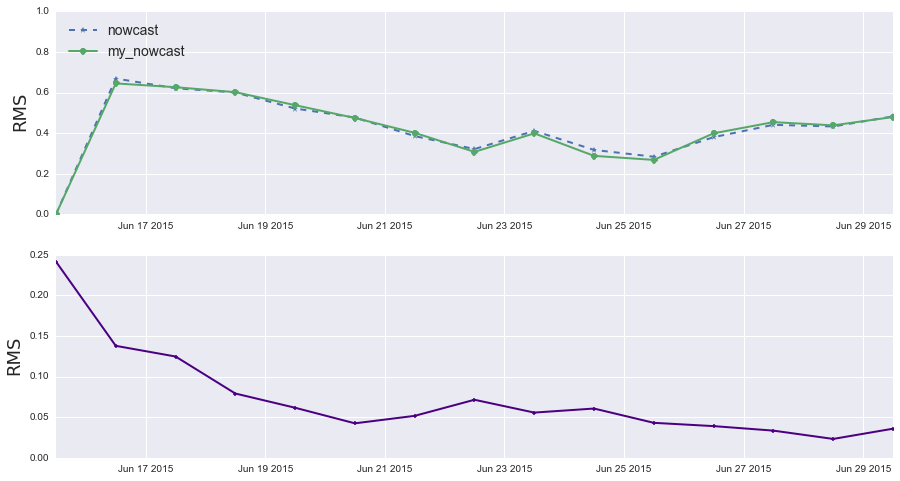

In [6]:
fig = rms_bothnowcasts_15(u_daily,v_daily,time_dailyuse)